In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
%cd '/content/drive/My Drive/DigiKala'

/content/drive/My Drive/DigiKala


In [ ]:
#!unzip 'nlp_comments_users.zip'

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [23]:
df_train = pd.read_csv('train_users.csv')
print(df_train.shape)
df_train.head(2)

(264399, 10)


,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer,verification_status,rate
0,0,NaN,مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه,NaN,NaN,ژل ضد عفونی کننده دست شون مدل Aloevera حجم 300...,ضدعفونی کننده,1,1,100.0
1,1,Redmi 8,با این مبلغ اگه امکانات و ارزش خرید واستون مهم...,"[""رم4\r"",""قیمت نسبت به سایر برندها\r"",""طراحی و...","[""نداشتن هندزفری""]",گوشی موبایل شیائومی مدل Redmi 8 M1908C3IG دو س...,گوشی موبایل,1,1,80.0


In [24]:
df_test = pd.read_csv('test_users.csv')
print(df_test.shape)
df_test.head(2)

(19399, 8)


,id,title,comment,advantages,disadvantages,title_fa_product,title_fa_category,is_buyer
0,0,با کیفیت,بسته بندی بهداشتی و کیفیت عالی,NaN,NaN,گوش پاک کن کتابی پنبه ریز بسته 200 عددی,گوش پاک کن,1
1,1,گوشی موبایل شیائومی,این گوشی فوق‌العاده است,"[""این گوشی همه چیش فوق‌العاده است از دوربین تا...","[""اصلا هیچ نقاط ضعفی نداره ""]",گوشی موبایل شیائومی مدل Redmi Note 8 M1908C3JG...,گوشی موبایل,1


(9918, 10)
(254481, 10)


Text(0.5, 1.0, 'Number of accepted and rejected comments')

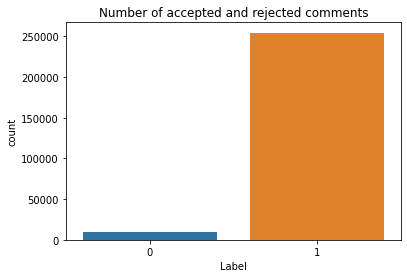

In [25]:
print(df_train[df_train['verification_status'] == 0].shape)
print(df_train[df_train['verification_status'] == 1].shape)
sns.countplot(df_train['verification_status'])
plt.xlabel('Label')
plt.title('Number of accepted and rejected comments')

In [26]:
df_train.isna().sum()

id                          0
title                   85568
comment                  1667
advantages             218712
disadvantages          235916
title_fa_product            0
title_fa_category           0
is_buyer                    0
verification_status         0
rate                        0
dtype: int64

***
Training

In [27]:
train = df_train
train.fillna(' ', inplace=True)

train['content'] = train['title'] + \
                   train['comment'] + \
                   train['advantages'] + \
                   train['disadvantages'] + \
                   train['title_fa_product'] + \
                   train['title_fa_category']
train = train[['verification_status', 'content']]
train.head()

,verification_status,content
0,1,مثل بقیه محصولات الکل دار پوست رو خشک نمیکنه ...
1,1,Redmi 8با این مبلغ اگه امکانات و ارزش خرید واس...
2,1,عالیخوبه فقط کج و کوله بدستم رسید ولی پسرم خیل...
3,1,در کل خوب بود ولی متاسفانه درب محصول شکسته بو...
4,1,من که خیلی باهاش حال کردم فقط من که همیشه L م...


In [28]:
test = df_test
test.fillna(' ', inplace=True)

test['content'] = test['title'] + \
                  test['comment'] + \
                  test['advantages'] + \
                  test['disadvantages'] + \
                  test['title_fa_product'] + \
                  test['title_fa_category']
test = test['content']
test.head()

0    با کیفیتبسته بندی بهداشتی و کیفیت عالی  گوش پا...
1    گوشی موبایل شیائومیاین گوشی فوق‌العاده است["ای...
2     صداش قطع میشه باتریشم خیییلی ضعیفه  هدفون بی ...
3     بنظرم‌ خوبه  خمیر دندان نسیم مدل Feluoride Pr...
4    عااالیهعااالیه["عاااالیه"] کرم موبر صورت و بدن...
Name: content, dtype: object

In [29]:
X_train = train['content']
y_train = train['verification_status']
X_test = test

In [54]:
max_words = 1500
max_len = 50
tok = Tokenizer(num_words = max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen = max_len)

In [55]:
def RNN():
  inputs = Input(name='inputs', shape = [max_len])
  layer = Embedding(max_words, 50, input_length = max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256, name = 'FC1')(layer)
  layer = Activation('relu')(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1, name = 'out_layer')(layer)
  layer = Activation('sigmoid')(layer)
  model = Model(inputs = inputs, outputs = layer)
  return model

In [56]:
model = RNN()
model.summary()
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 50)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 50, 50)            75000     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_12 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)               

In [57]:
model.fit(sequences_matrix,
          y_train,
          batch_size = 128,
          epochs = 5,
          validation_split = 0.2,)
          #callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/5
1653/1653 [==============================] - 29s 17ms/step - loss: 0.1124 - accuracy: 0.9646 - val_loss: 0.0941 - val_accuracy: 0.9673
Epoch 2/5
1653/1653 [==============================] - 29s 17ms/step - loss: 0.0907 - accuracy: 0.9673 - val_loss: 0.0875 - val_accuracy: 0.9673
Epoch 3/5
1653/1653 [==============================] - 28s 17ms/step - loss: 0.0836 - accuracy: 0.9692 - val_loss: 0.0858 - val_accuracy: 0.9690
Epoch 4/5
1653/1653 [==============================] - 28s 17ms/step - loss: 0.0789 - accuracy: 0.9706 - val_loss: 0.0866 - val_accuracy: 0.9678
Epoch 5/5
1653/1653 [==============================] - 28s 17ms/step - loss: 0.0755 - accuracy: 0.9715 - val_loss: 0.0864 - val_accuracy: 0.9686


In [58]:
txts = tok.texts_to_sequences(X_test)
txts = sequence.pad_sequences(txts, maxlen=max_len)
preds = model.predict(txts)

In [59]:
y_test = preds.tolist()

ys = []
for y in y_test:
  if y[0] > 0.5:
    ys.append(1)
  else:
    ys.append(0)

df_final = pd.DataFrame(ys)
df_final.head()

,0
0,1
1,1
2,1
3,1
4,1


In [60]:
df_final.to_csv('ver_status.csv', index = True, index_label=['id'], header=['verification_status'])